http://www.axel-dreher.de/Dreher%20et%20al._Aid_China_Growth.pdf



--- 
Project for the course in Microeconometrics / OSE Data Science | Summer 2021, M.Sc. Economics, Bonn University | [Jonathan Willnow](https://github.com/JonathanWillnow)

# Replication of Dreher et. al (2020): Aid, China, and Growth: Evidence from a New Global Development Finance Dataset  <a class="tocSkip">   
---
    
    Which year????!!!! Clarify!

The aim of this notebook is to replicate the following paper:

> Dreher et. al (2021): Aid, China, and Growth: Evidence from a New Global Development Finance Dataset. American Economic Journal: Economic Policy, vol. 13(2), may 2021 (pp. 135-74).


##### Downloading and viewing this notebook:

* The best way to view this notebook is by downloading it and the repository it is located in from [GitHub](https://github.com/OpenSourceEconomics/ose-data-science-course-project-JonathanWillnow). Other viewing options like _MyBinder_ or _NBViewer_ may have issues with displaying images or coloring of certain parts (missing images can be viewed in the folder [files](https://github.com/OpenSourceEconomics/ose-data-science-course-project-JonathanWillnow) on GitHub).


* The original paper, as well as the data and code provided by the authors can be accessed [here](https://www.aeaweb.org/articles?id=10.1257/pol.20180631).

##### Information about replication and individual contributions:

* For the replication, I try to remain true to the original structure of the paper so readers can easily follow along and compare. All tables and figures are named and labeled as they appear in Lindo et al. (2010).


* The tables in my replication appear transposed compared to the original tables to suit my workflow in Python.


* For transparency, all sections in the replication that constitute independent contributions by me and are not part of results presented (or include deviations from the methods used) in the paper are marked as _extensions_. 

# Table of Contents

### Library imports

In [9]:
%matplotlib inline
import numpy as np
import pandas as pd
import pandas.io.formats.style
import seaborn as sns
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm_api
import matplotlib.pyplot as plt
import geopandas 
from IPython.display import HTML

In [10]:
from auxiliary.auxiliary_predictions import *
from auxiliary.auxiliary_plots import *
#from auxiliary.example_project_auxiliary_tables import *


# 1. Introduction

The Belt and Road Initiative (BRI), better known as The "new silk road initiative" is just one of many instances of China´s overseas activities of financing development, especially known to the europeans. Other projects, mostly infrastructure projects (by transaction value), link China within Asia and with the African continent. This role of China as significant donor raises strong opinions, but the debate was based on only little facts since most of the details are not officially reported. The paper at hand uses the Tracking Underreported Financial Flows (TUFF) methodology to introduce a new dataset that provides the needed evidentiary foundations that was needed for this issue.

Dreher et. al adress two questions: 

* Does Chinas financial development finance led to economic growth?
* Does Chinas finance undermine the effectivness of western development finance?

+ Argumente??!!

To answer this question on whether and how Chinese development finance affects economic growth, instrumental vriabales are employed that make use of the year-to-year changes in the supply of Chinese development finance (which will be introduced) in tandem with cross-sectional variation which is determined by the probability that countries receive such funding.

# 2. The Tracking Underreported Financial Flows (TUFF) methodology

The data set is constructed using the Tracking Underreported Financial Flows (TUFF) methodology which codifies a set of open source data collection procedures in a systematic, transparent and replicable way. This methodology was origionally developed by Strange et. al(2012) in collaboration with AidData, a research lab at William and Mary and has been used and improved many times (for p.62). It enables us to identify detailed financial, locational and even operational informations about officially financed projects that are NOT recorded by the donors and lenders (here China) through the international reporting systems, like the OECD’s Creditor Reporting System (CRS) or the International Aid Transparency Initiative (IATI).

Since the authors of the paper address the relevance of this methodology many times and the constructed data set is unique in its range and accuracy, we will briefly explore the TUFF methodology. 

### First Stage
This represents the stage of primary data collection. All recorded projects of interest were collected. In parallel, potential projects at the donor/lender-recipient/borrower-year unit got identified and collected by a standartizied set of search querries. The database of choice for this dataset is the media database Factivia wich collects newspapers, radio and television transcript worldwide in 28 languages. This set of documents is then filtered using a machine learning algorithm, trained with large amounts of past identified and classified documents. A subset of documents is determined which are most likely to contain information on officially by china financed projects. Each object of the subset was then reviewed by the team and assessed whether it contained the information or not.

### Second Stage
The so gathered set of documents is then subject to a second review and augmention to validate/ invalidate it and potentionally add to the project informations in order to improve the accuracy and scope. This is performed by native speakers and language experts. For this specific dataset, the researchers also collected informations from entities like the private contractors of the projects, experts with specific tacit knowledge for specific projects and also involved external reviewers that did fildwork on a specific project or country. As a measure of validity, the researchers calculate sytematically triangulation and completness scores for each project. This triangulation and the related score achives a higher validity and reduced systematic risk, but also avoids the over-reliance on Factivia.

### Third Stage
The aim of this stage is to maximize the reliability and completeness of the records on the individual projects by quality assurance procedures. This involves the identification and correcting of inconsistent coding e.g caused by different categorized standarts, several de-duplication procedures and the vetting of each individual project record by higher ranking researchers as this whole process involves `HOWMANY?` researchers and assistants. All projects with poor records and relativly high transaction value get indentified by the triangulation and completeness scores and undergoe another review.
Finally the constructed dataset gets peer-reviewed by internal and external reviewers. For this specific dataset, more than 30 external and interbal reviewers were involved.


---
<span style="color:blue">**NOTE**:</span> More information about AidData´s TUFF Methodology, its development and coder instructions can be found [here](https://www.aiddata.org/publications). This section was based on Strange et. al(2017): AidData's Tracking Underreported Financial Flows (TUFF) Methodology, Version 1.3. Williamsburg, VA: AidData at William & Mary.



---

# 3. Theoretical Background

The aim is to analyze the causal effects of the Chinese development finance on growth. The authors set up the following regression for all recipient countries not listed as high-income countries by the worldbank given the year $t$:


\begin{equation}
Growth_{i,t} = \beta_{1}OF_{CHN,i,t-2} + \beta_{2}pop_{i,t-1} + \beta_{3}\eta_{i} + \beta_{4}\mu_{t} + \epsilon_{i,t'} 
\end{equation}

* $Growth_{i,t}$ as recipients country $i$´s real GDP per capita growth in $t$,
* $OF_{CHN,i,t-2}$ as measure of Chinese development finance two years before (either as the number of projects or their logged financial value),
* $pop_{i,t-1}$ indicates recipients $i$ logged population size in $t_{-1}$,
* $\eta_{i}$ represents country-fixed effects,
* $\mu_{t}$ the time fixed effects and
* $\epsilon_{i,t'}$ the error term.

As can be seen in this setup, the development finance $OF_{CHN,i,t-2}$ is likely to be endogenous to the dependent variable $Growth_{i,t}$. A potential source of its endogeneity is reverse causation: Not only does Chinese financial development has the potential to drive grwoth, but the growth of a recipient country may influence Bejjings decision to deploy development finance. The Chinese development finance and the real GDP per capita growth may positively correlated as the Chinese government prefers to concentrate its development finance towards countries with high growth, but also a negative correltation is possible due to its stated goal "to ensure its aid benefits as many needy people as possible" (p15, also state council 2011). Also when looking on this regression, it is rather lean compared to the rich dataset. It is therefore possible that $\epsilon_{i,t'}$ correlates with the dependent variable, so we have the risk of ommited-variable bias. 

### IV strategy

These described endogeneity is adressed by designing an instrumental variables regression using the following first-stage regresion:

\begin{equation}
OF_{CHN,i,t-2} = \gamma_{1}Material_{t-3} * p_{CHN,i} + \gamma_{2}Reserves_{t-3} * p_{CHN,i} + \gamma_{3}pop_{i,t-1} + \gamma_{4}\eta_{i} + \gamma_{5}\mu_{t} + \mu_{i,t-2} 
\end{equation}

Since the two interacted variables are expected to have positive coefficients, it indicates, that countries which frequently receive financial development from China are expected to benefit disproportionally from increasing overproduction of materials and foreign reservres.The instruments that are used are:


* $Material_{t-3}$ the lagged, detrended and logged Chinese production materials varying in $t$,
* $Reserves_{t-3}$, the lagged and detrended change in China´s ne foreign exchange reserves,

both interacted with:
* $p_{CHN,i}$ the probability of country $i$ receiving Chinese development finance, as share of years in the 2000-2014 period that country $i$ has received Chinese development finance.

An obvious issue with these two instruments is the possible vioaltion of the exclusion restriction since $p_{CHN,i}$, the probability of receiving development projects, may be directly linked to economic growth. Therefore, the authors include country and year fixed effects, $\eta_{i}$ and $\mu_{t}$ respictively, to control for the country- and time specific effects of $p_{CHN,i}$ as well as for the levels of Materials and Reserves. 

### Difference-in-difference regression
Since we measure the differential effects that $Material_{t-3}$ and $Reserves_{t-3}$ have on the amount of Chinese development finance $OF_{CHN,i,t-2}$ for countries with a high compared to a low probability of receiving this projects, we use the intuition of a difference-in-difference setting:

Allthough the probability of receiving projects differs among the recipient countries, we assume that the real GDP per capita growth $Growth_{i,t}$ of all countries grouped by different $p_{CHN,i}$ is not affected differently by changes in the availability of $Material_{t-3}$ and $Reserves_{t-3}$, but only affected via $OF_{CHN,i,t-2}$, while we are controlling for country- and year-fixed effects. 
Therefore, $Material_{t-3}$ and $Reserves_{t-3}$ are assumed to be exogenous to official financing since they both cannot be correlated with the errorprocess and we have an exogenous treatment $OF_{CHN,i,t-2}$ for our regression.

Lets look at the key assumption of DiD (parallel trends), which states that average outcomes of the groups in the absence of treatment would follow parallel paths over time. This assumption is satisfied, since we assume that growth of countries with different probabilities of receiving projects is not affected differently by changes in $Material_{t-3}$ and $Reserves_{t-3}$ as stated before. This assumption allows to account for the unobserved variables, here the country- and year specific effects. Under this assumption, the interaction of $p_{CHN,i}$ with the two described exogenous variables for the IV strategy result in two valid exogenous intruments. 





https://www.publichealth.columbia.edu/research/population-health-methods/difference-difference-estimation
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4937082/  DiD Regressions
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6096851/  instrumental variables


https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/factor-analysis/
https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/factor-analysis-2/







# 4. Replication

## 4.1 The Dataset


In [3]:
data = pd.read_stata("data/work2_dataset_CDF.dta")
data.shape

(4304, 61)

The dataset of Dreher et al(), constructed with the introduced TUFF methodology, covers 4,304 Chinese financed development projects that were commited, implemented or completed between 2000 and 2014 in 138 countries worldwide, based on 15,500 unique sources of information as described above. As can be seen by the output, it contains 61 columns that describe the 4,304 projects.

#### The distribution of project types

The authors distinguishes between three different categories of development financing:

* ODA-like projects for the promotion of economic or social development, provided at OECD-DAC level of concessionality,
* OOF-like projects, non-development purposes like export promotions with insufficient concessionality and
* Vague-OF projects, which cannot be proplerly categorized because f insufficient information at hand

The Dataset not only allows us to look at the number of projects, but it is also possible to divide the projects into the three classes by their financial value: 


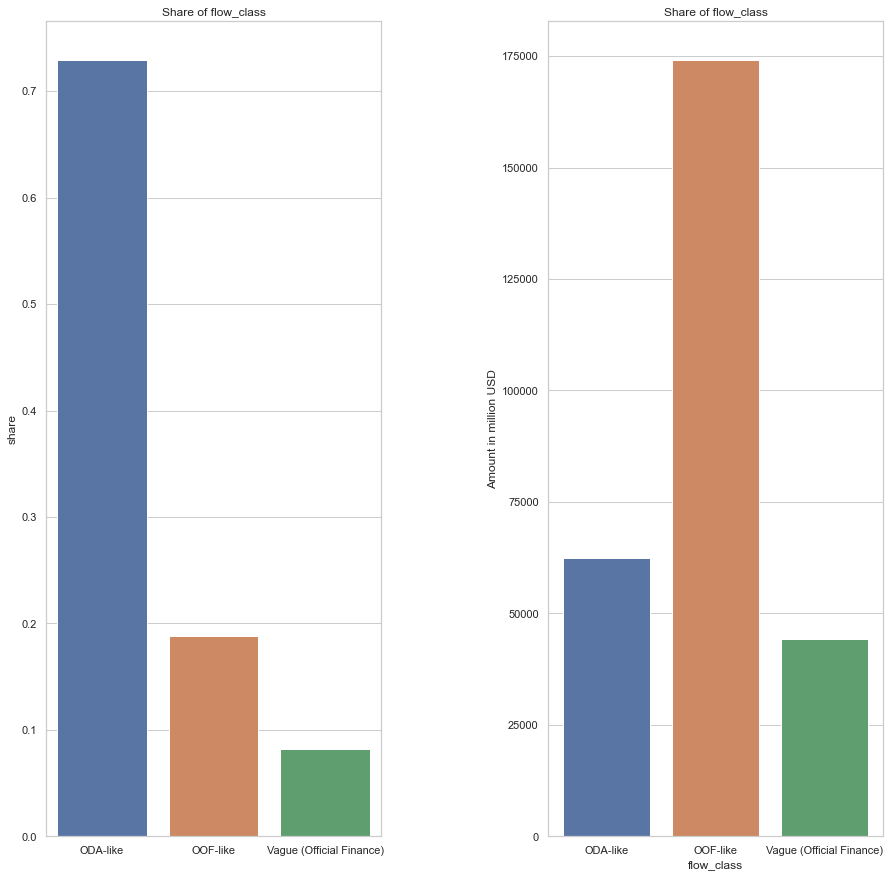

In [4]:
df = flow_class_plot(data)

The acutal distribution of Chinese financial development finance:

In [5]:
df 

,flow_class,Share,Amount in USD
0,ODA,0.729554,6.240747e+04
1,OOF,0.187965,1.879647e-07
2,Vague,0.082481,4.423448e+04


As the plot indicates and the dataframe varifies, the majority of projects are ODA-like projects (73%) with a OECD-DAC level of concessionality. When we shift the focus of the analysis to the financial value, these 73% of total rojects only account for roughly 22% of the total financial amount. The majority of Chinese financing is OOF-like. By the charackter of the OOF-like projects (export promotions,...) this high financial value might already indicate that the Chinese use development finance first and foremost as a mean to help themselves.

In [8]:
helper = data.groupby("crs_sector_name").usd_current.sum()
(helper["Health"] + helper["Education"] + helper["Government and Civil Society"]) / 1e6

6800.269834833721

#### Sectoral distribution 

The dataset contains the OECD-DAC sector classifications of each coded project.

Again, it is important to distinguish between the number of projects per sector and the financial value of development finance that the Chinese Governemnt invests in this sector. The two plots indicate that by far the most fimancial value is invested in the sectors of ernergy, followed by transportation and industry, mining and construction. While looking at the project count, the picture is completly different: Most projects are in the health-, education- and governance sector, but do only account for 

2.421611440930295e-08


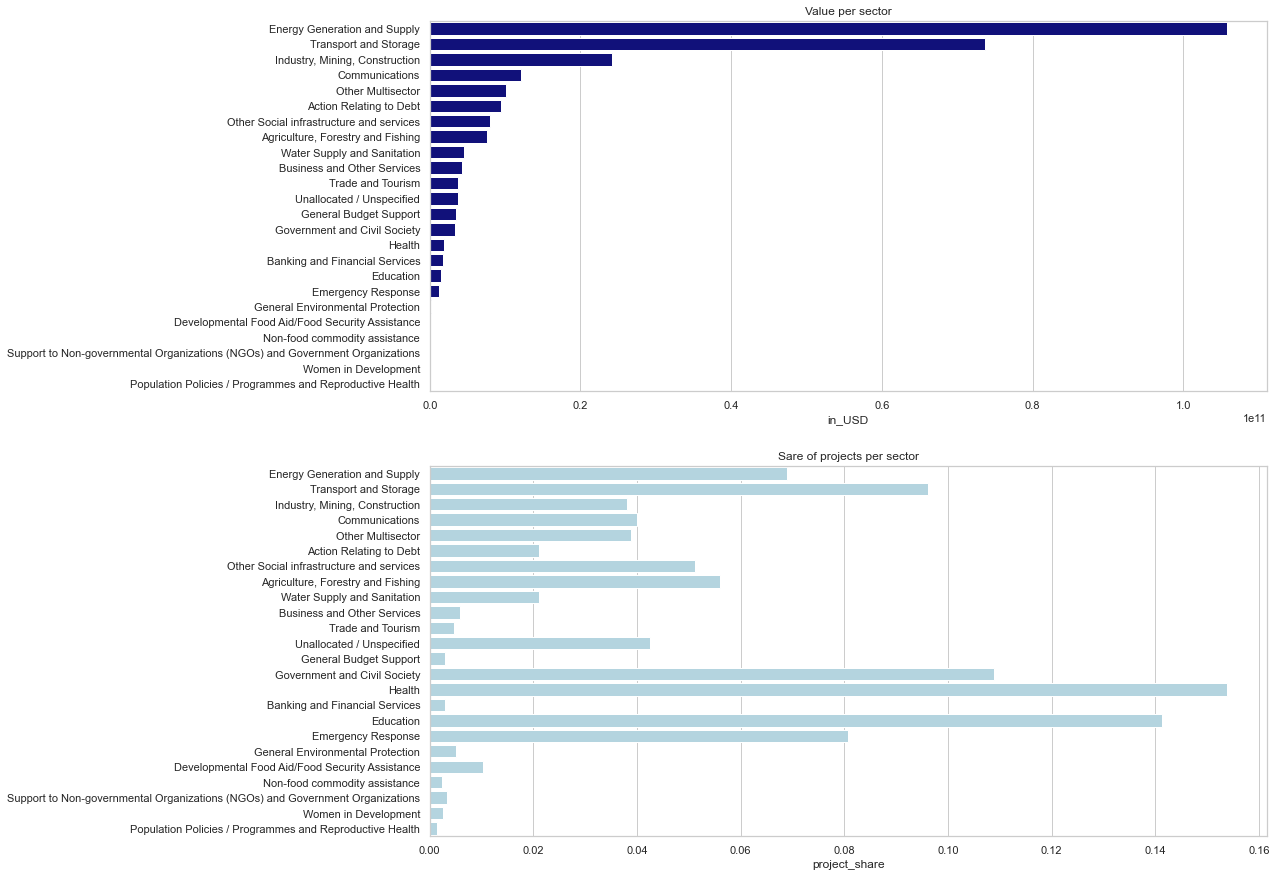

In [7]:
sectoral_plot(data)

#### Number of projects over time



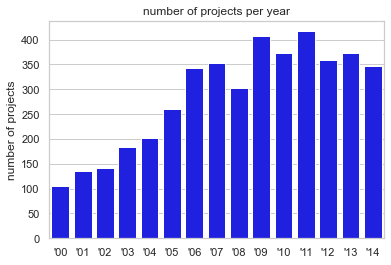

In [9]:
year_plot(data)

In [24]:
# we have a problem with the data!
# mending and modifying the dataset
problems = data[data.usd_current == "."].index 
for i in problems:
    data.usd_current[i] = np.nan

data.usd_current = pd.to_numeric(data.usd_current)
data.groupby("crs_sector_name").usd_current.sum()

crs_sector_name
Action Relating to Debt                                                          9.443258e+09
Agriculture, Forestry and Fishing                                                7.588313e+09
Banking and Financial Services                                                   1.785891e+09
Business and Other Services                                                      4.292244e+09
Communications                                                                   1.213404e+10
Developmental Food Aid/Food Security Assistance                                  7.521485e+07
Education                                                                        1.463140e+09
Emergency Response                                                               1.237878e+09
Energy Generation and Supply                                                     1.057687e+11
General Budget Support                                                           3.508241e+09
General Environmental Protection            

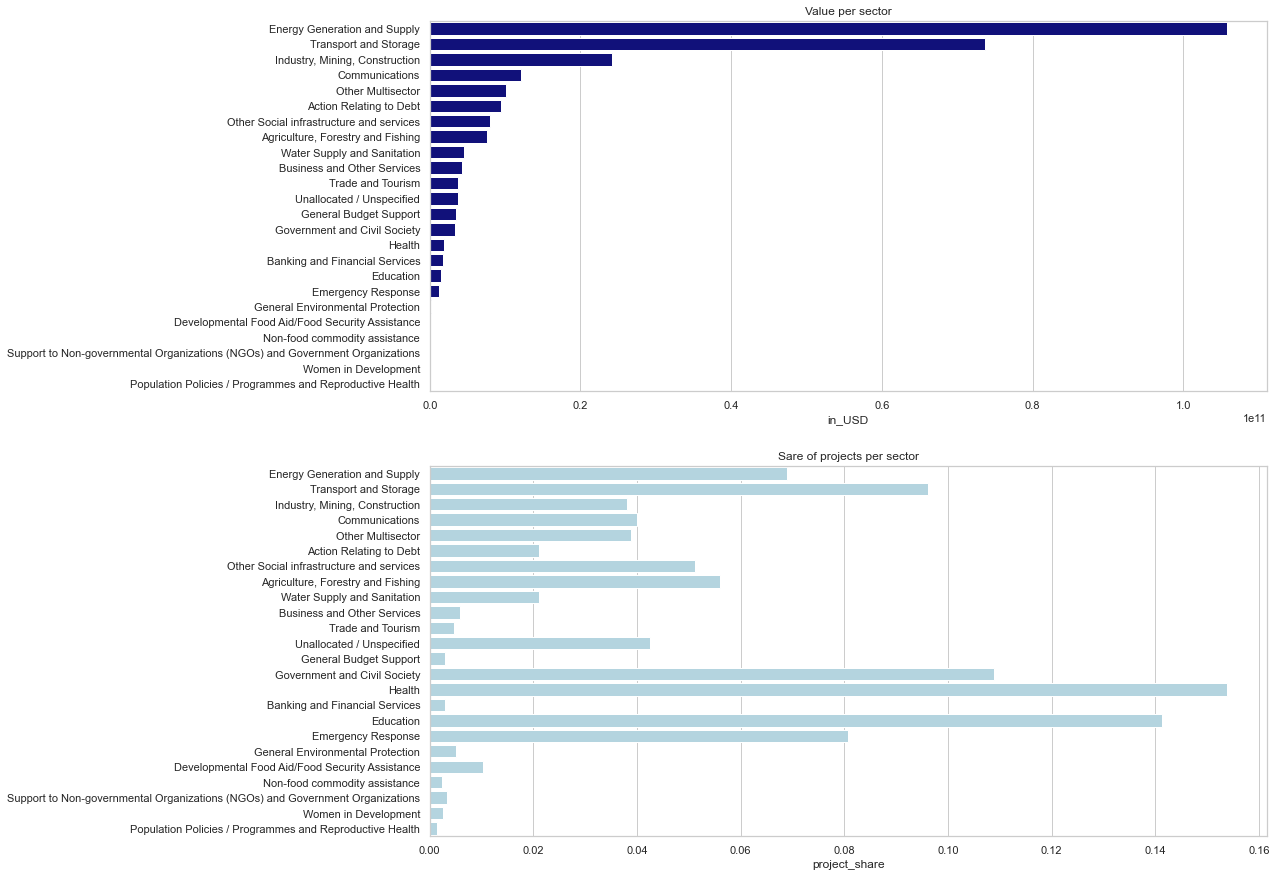

In [21]:
sns.set_theme(style="whitegrid")
sectoral_analysis_df = data.crs_sector_name.value_counts(1).sort_index().to_frame("project_share")
sectoral_analysis_df["in_USD"] = data.groupby("crs_sector_name").usd_current.sum()
sectoral_analysis_df = sectoral_analysis_df.sort_values(by="in_USD", ascending=False)

# plotting
f, axs = plt.pyplot.subplots(2,1,figsize=(15,15))
plt.pyplot.subplot(211)
ax = sns.barplot(y=sectoral_analysis_df.index, x=sectoral_analysis_df.in_USD, color = "darkblue")
ax.set_title("Value per sector");

plt.pyplot.subplot(212)
ax = sns.barplot(y=sectoral_analysis_df.index, x=sectoral_analysis_df.project_share, color = "lightblue")
ax.set_title("Sare of projects per sector");



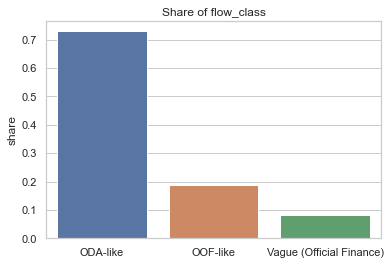

## 4.2 Descriptive Statistics

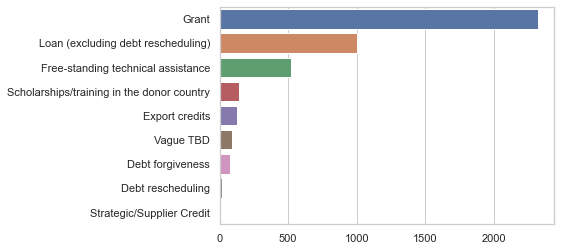

In [110]:
ax = sns.barplot(y = data.flow.value_counts().index, x = data.flow.value_counts().values)

In [3]:
world_data_df = pd.read_stata('data/map_1yw_merge.dta')

In [4]:
world_data_df.head()

,FIPS_CNTRY,GMI_CNTRY,ISO_2DIGIT,recipient_iso3,ISO_NUM,CNTRY_NAME,LONG_NAME,POP2007,SQKM,SQMI,LAND_SQKM,COLORMAP,id,OFa_all_con,probaid_PRC_OFn_all
0,AA,ABW,AW,ABW,533.0,Aruba,Aruba,72194.0,139.93,54.03,193.0,1.0,42.0,0.000000e+00,0.000000
1,AF,AFG,AF,AFG,4.0,Afghanistan,Islamic Republic of Afghanistan,31889923.0,641358.44,247628.48,647500.0,3.0,177.0,1.356742e+08,0.933333
2,AO,AGO,AO,AGO,24.0,Angola,Republic of Angola,12263596.0,1252934.88,483758.22,1246700.0,1.0,221.0,1.316403e+10,0.933333
3,AV,AIA,AI,AIA,660.0,Anguilla,Anguilla,13677.0,74.48,28.76,102.0,6.0,59.0,NaN,NaN
4,AL,ALB,AL,ALB,8.0,Albania,Republic of Albania,3600523.0,28798.00,11118.91,27398.0,6.0,122.0,2.330109e+08,0.733333


In [5]:
largest_recipiants_df = world_data_df.sort_values(by="OFa_all_con", ascending=False)
largest_recipiants_df.head(5)

,FIPS_CNTRY,GMI_CNTRY,ISO_2DIGIT,recipient_iso3,ISO_NUM,CNTRY_NAME,LONG_NAME,POP2007,SQKM,SQMI,LAND_SQKM,COLORMAP,id,OFa_all_con,probaid_PRC_OFn_all
180,RS,RUS,RU,RUS,643.0,Russia,Russian Federation,141377752.0,16897294.00,6524043.50,16995800.0,1.0,104.0,2.871752e+10,0.600000
163,PK,PAK,PK,PAK,586.0,Pakistan,Islamic Republic of Pakistan,169270617.0,880202.69,339846.25,778720.0,4.0,180.0,1.934071e+10,0.933333
2,AO,AGO,AO,AGO,24.0,Angola,Republic of Angola,12263596.0,1252934.88,483758.22,1246700.0,1.0,221.0,1.316403e+10,0.933333
67,ET,ETH,ET,ETH,231.0,Ethiopia,Federal Democratic Republic of Ethiopia,76511887.0,1134156.00,437897.63,1119683.0,4.0,94.0,1.226241e+10,0.933333
123,CE,LKA,LK,LKA,144.0,Sri Lanka,Democratic Socialist Republic of Sri Lan,20926315.0,64665.21,24967.24,64740.0,7.0,165.0,1.008200e+10,0.866667


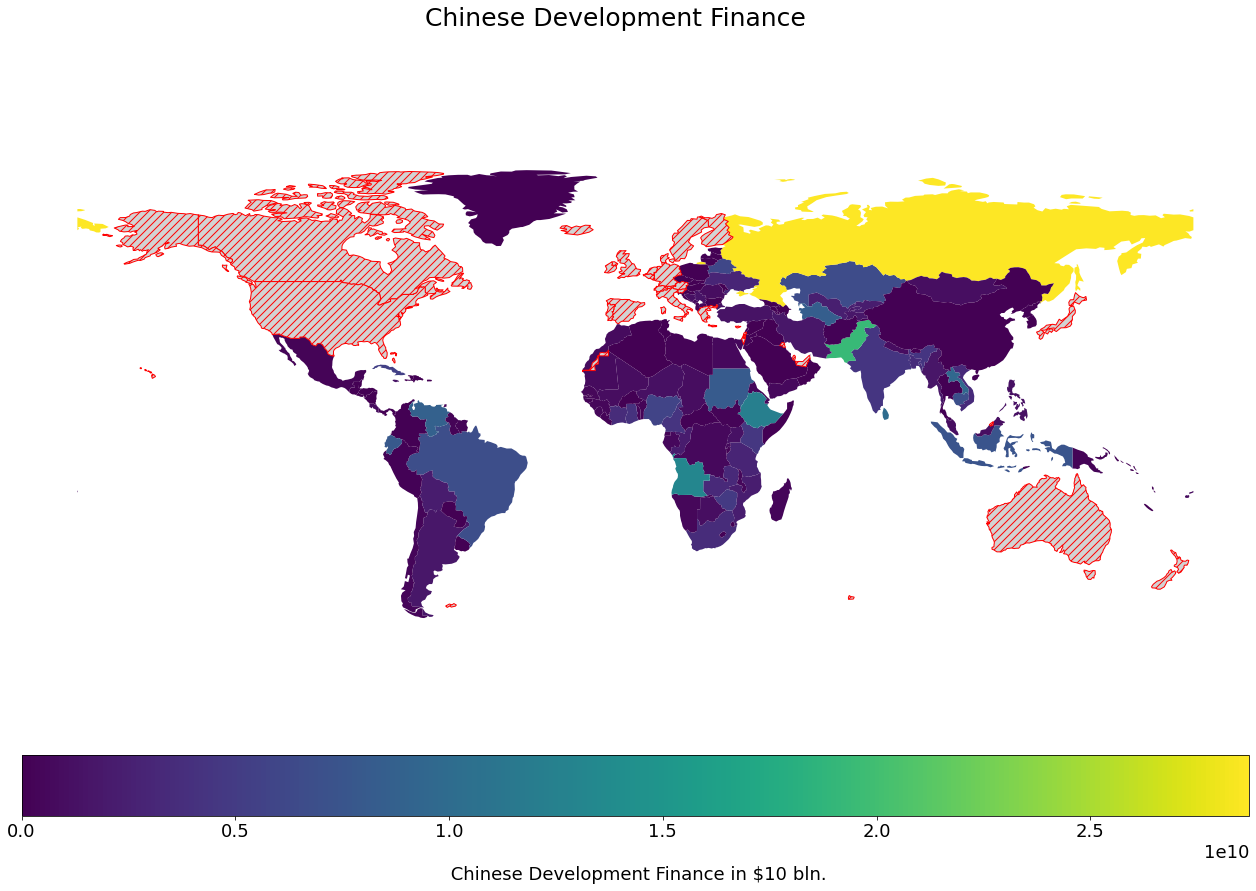

In [6]:
worldplot(world_data_df)


# Literature to do´s

* Tracking Underreported Financial Flows 
(TUFF) methodology developed by Strange et al. (2017a, 2017b),
* Interview Prime minister Ethophia ("main reason for turnaround in fate in africa") http://et.china-embassy.org/eng/zagx/t899134.htm


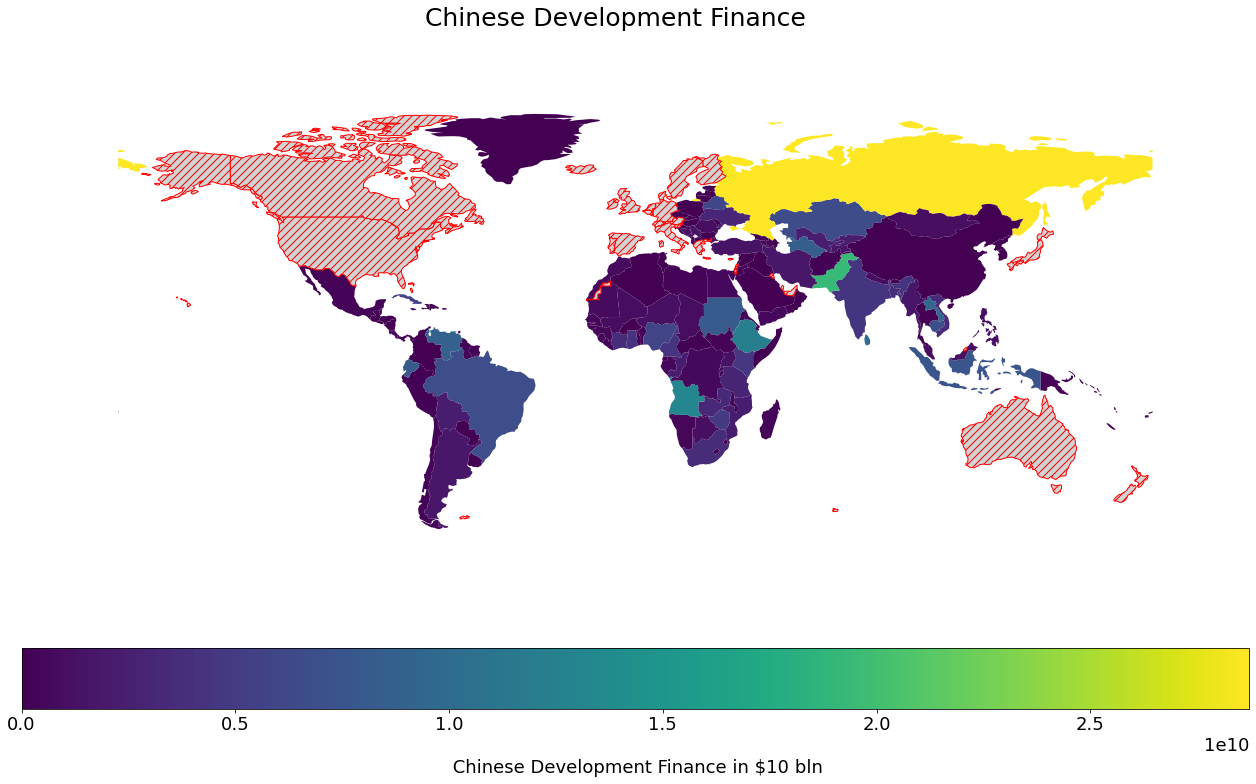

In [7]:

worldplot_2(world_data_df, "recipient_iso3", "OFa_all_con")
